<a href="https://colab.research.google.com/github/Hojiakbardevs/Datascience/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv", index_col=0)

In [3]:
data.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


Ustunlar ta'rifi
location - sotilayotgan uy manzili
district - uy joylashgan tuman
rooms - xonalar soni
size - uy maydoni (kv.m)
level - uy



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7278 entries, 0 to 7464
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7278 non-null   object 
 1   rooms       7278 non-null   int64  
 2   size        7278 non-null   float64
 3   level       7278 non-null   int64  
 4   max_levels  7278 non-null   int64  
 5   price       7278 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 398.0+ KB


In [5]:
data['district'].value_counts()

district
Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

#men faqat chilonzor uchun regressiya orqali ajratib olaman


In [6]:
housing = data[data['district'] == 'Чиланзарский']

In [7]:
housing

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7404,Чиланзарский,3,70.0,3,4,48000.0
7422,Чиланзарский,1,20.0,5,5,18500.0
7433,Чиланзарский,1,32.0,3,4,28000.0
7445,Чиланзарский,3,70.0,1,4,49800.0


In [8]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [9]:
Y = housing['price']
Y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

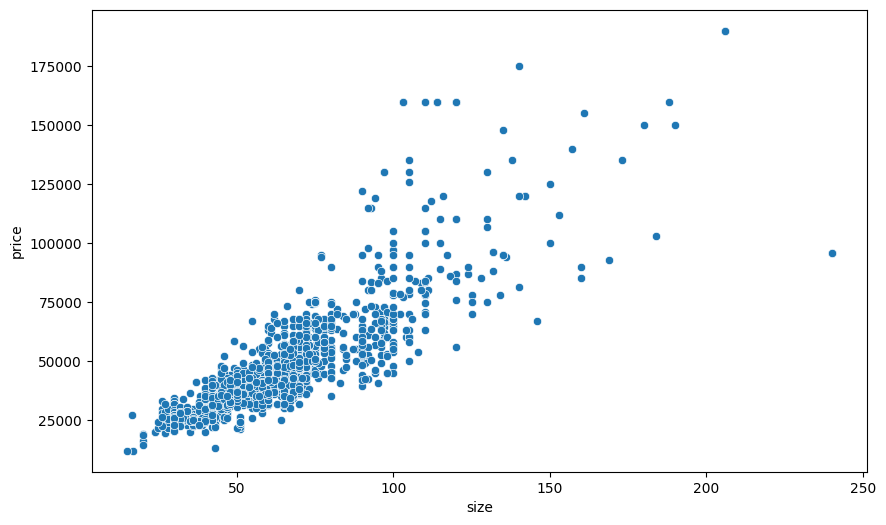

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = housing, x='size', y = 'price')
plt.show()

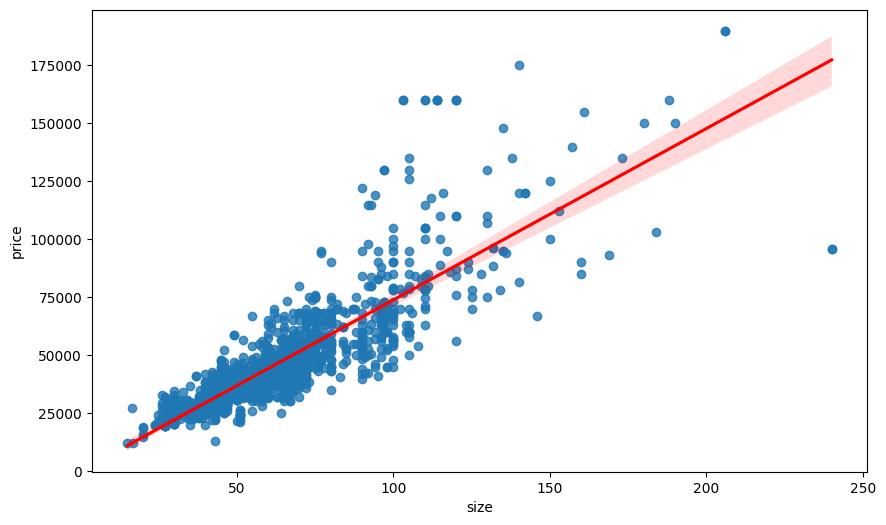

In [12]:
plt.figure(figsize=(10,6))
sns.regplot(data = housing, x = 'size', y ='price', line_kws={'color':'red'})
plt.show()

In [15]:
Xmean = np.mean(X)
Ymean = np.mean(Y)


In [21]:
theta1 = np.sum((X - Xmean)*(Y-Ymean))/np.sum((X-Xmean)**2)
theta1

740.0264822713249

In [23]:
theta0 = Ymean - theta1 * Xmean
theta0

-195.94911352666531

In [31]:
X_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"X_test = {X_test}")
Y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"Y_test = {Y_test}")

X_test = [54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]
Y_test = [37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


In [33]:
Y_predict = theta0 + theta1 * X_test
Y_predict

array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])

In [35]:
# Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblayman

MAE = np.sum(np.absolute(Y_predict - Y_test))/len(Y_test)
print(f"O'rtacha absolyut xatolik = {MAE}")

O'rtacha absolyut xatolik = 4140.3503163471805


In [37]:
RMSE = np.sqrt(np.sum((Y_predict - Y_test)**2)/len(Y_test))
print(f"O'rtacha kvadratik ildizi xatoligi = {RMSE}")

O'rtacha kvadratik ildizi xatoligi = 5882.051673173725


# **Endi Sckiti -learn tayyor kutubxonalar yordamida ishlashni o'rganaman **

In [38]:
housing.shape

(1616, 6)

In [45]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.10, random_state=42)

Endi linear regression model yordamida natijani chiqaraman


In [46]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni o'qitaman

LR_model.fit(x_train, y_train)


LinearRegression()

In [47]:

# theta1 va theta 0 koeffitsiyentlarni ajratib olaman

theta11 = LR_model.coef_[0][0]
theta00 = LR_model.intercept_[0]

print(theta11)
print(theta00)

732.7784051414766
106.31843170110369


θ
0
​
  va
𝜃
1
θ
1
​
  qiymatlari yordamida to'g'ri chiziq chizamiz
  

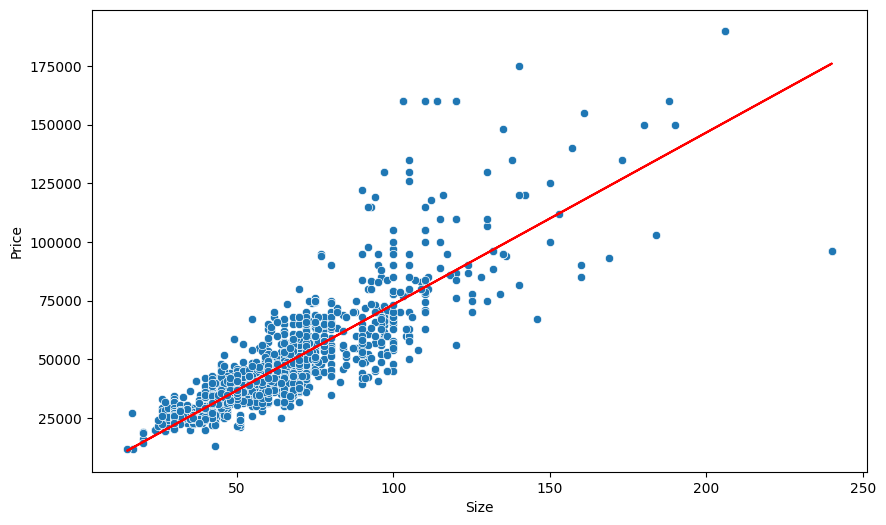

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = housing, x= 'size', y = 'price')
plt.plot(x_train, theta11 * x_train  + theta00, '-r')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

In [50]:
# Modelni baholaymiz

x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])


In [51]:
y_predict = LR_model.predict(x_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

print(MAE)
print(RMSE)

7269.709648262382
12734.803748258666
